Name: Abdullah Zaheer

---


Reg#: sp22-BSE-004

---



Task 1

---


Imagine you're a tourist in Pakistan, and you want to travel from Islamabad to Karachi. You
want to find the shortest route in terms of the number of cities you need to travel through. The
cities are connected through highways, and your goal is to find the shortest path using BFS.


---


Cities and Their Connections (Graph):
You will use the following cities and their connections for this scenario:

---


• Islamabad is connected to Rawalpindi, Lahore, and Peshawar.

---


• Rawalpindi is connected to Islamabad, Peshawar, and Quetta.

---


• Peshawar is connected to Islamabad, Rawalpindi, and Quetta.

---


• Lahore is connected to Islamabad, Multan, and Quetta.

---


• Multan is connected to Lahore, Karachi, and Quetta.

---


• Quetta is connected to Rawalpindi, Peshawar, Multan, and Karachi.

---


• Karachi is connected to Multan and Quetta.

---



In [5]:
from collections import deque

# Function to perform BFS and find the shortest path
def bfs_shortest_path(graph, start, goal):
    # Queue for storing paths to explore
    queue = deque([[start]])
    # Set to track visited cities
    visited = set([start])

    while queue:
        # Get the first path from the queue
        path = queue.popleft()
        # Get the last city from the path
        city = path[-1]

        # If the goal city is reached, return the path
        if city == goal:
            return path

        # Explore neighboring cities
        for neighbor in graph[city]:
            if neighbor not in visited:
                visited.add(neighbor)
                # Create a new path and add it to the queue
                new_path = list(path)
                new_path.append(neighbor)
                queue.append(new_path)

    return None  # If no path is found


# Define the graph (cities and their connections)
graph = {
    'Islamabad': ['Rawalpindi', 'Lahore', 'Peshawar'],
    'Rawalpindi': ['Islamabad', 'Peshawar', 'Quetta'],
    'Peshawar': ['Islamabad', 'Rawalpindi', 'Quetta'],
    'Lahore': ['Islamabad', 'Multan', 'Quetta'],
    'Multan': ['Lahore', 'Karachi', 'Quetta'],
    'Quetta': ['Rawalpindi', 'Peshawar', 'Multan', 'Karachi'],
    'Karachi': ['Multan', 'Quetta']
}

# Start and goal cities
start_city = 'Islamabad'
goal_city = 'Karachi'

# Find the shortest path
shortest_path = bfs_shortest_path(graph, start_city, goal_city)

# Print the result
if shortest_path:
    print(f"Shortest path from {start_city} to {goal_city}: {' -> '.join(shortest_path)}")
else:
    print(f"No path found from {start_city} to {goal_city}")

Shortest path from Islamabad to Karachi: Islamabad -> Rawalpindi -> Quetta -> Karachi


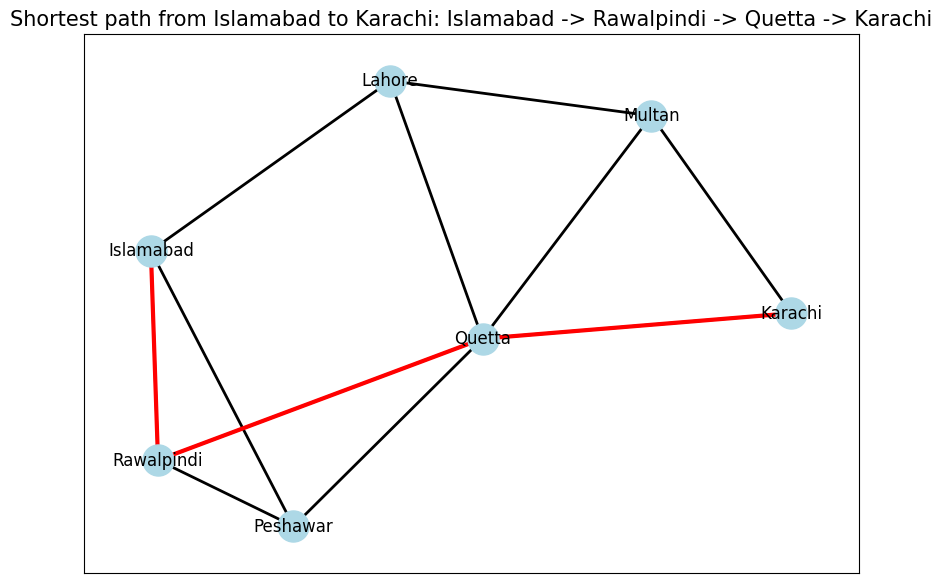

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the graph (cities and their connections)
graph = {
    'Islamabad': ['Rawalpindi', 'Lahore', 'Peshawar'],
    'Rawalpindi': ['Islamabad', 'Peshawar', 'Quetta'],
    'Peshawar': ['Islamabad', 'Rawalpindi', 'Quetta'],
    'Lahore': ['Islamabad', 'Multan', 'Quetta'],
    'Multan': ['Lahore', 'Karachi', 'Quetta'],
    'Quetta': ['Rawalpindi', 'Peshawar', 'Multan', 'Karachi'],
    'Karachi': ['Multan', 'Quetta']
}

# Function to perform BFS and find the shortest path
def bfs_shortest_path(graph, start, goal):
    queue = [[start]]
    visited = set([start])

    while queue:
        path = queue.pop(0)
        city = path[-1]

        if city == goal:
            return path

        for neighbor in graph[city]:
            if neighbor not in visited:
                visited.add(neighbor)
                new_path = list(path)
                new_path.append(neighbor)
                queue.append(new_path)

    return None

# Find the shortest path using BFS
start_city = 'Islamabad'
goal_city = 'Karachi'
shortest_path = bfs_shortest_path(graph, start_city, goal_city)

# Create the graph using networkx
G = nx.Graph()

# Add edges between cities
for city in graph:
    for neighbor in graph[city]:
        G.add_edge(city, neighbor)

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
plt.figure(figsize=(10, 7))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')

# Draw edges
nx.draw_networkx_edges(G, pos, width=2)

# Highlight the shortest path in red
if shortest_path:
    path_edges = list(zip(shortest_path, shortest_path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

# Show the plot
plt.title(f"Shortest path from {start_city} to {goal_city}: {' -> '.join(shortest_path)}", size=15)
plt.show()